In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
content = []
with open('circle.txt') as f:
    for lines in f.readlines():
        content.append(lines.strip().split(','))
        
data = np.array(content).astype('float')
data

array([[-0.67799938, -0.69875698],
       [ 0.93143746,  0.19139133],
       [ 0.54829131, -0.00601715],
       ...,
       [-0.34518816, -0.35804797],
       [ 0.01719727, -0.94513802],
       [ 0.91377877, -0.59884164]])

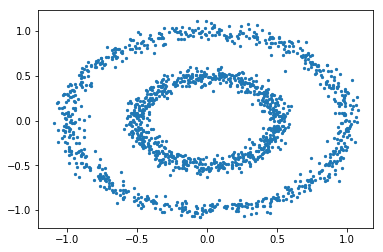

In [3]:
plt.scatter(data[:, 0], data[:, 1], s=5)
plt.show()

In [4]:
def kpp(dataset, K=2):
    centers = np.zeros((K, dataset.shape[1]))
    pick_num = np.random.choice(len(dataset), 1)[0]
    print("pick_num = {}".format(pick_num))
    centers[0] = dataset[pick_num]

    dist = np.linalg.norm((dataset - centers[0]), axis=1)**2
    p = dist/dist.sum()
    another = np.random.choice(len(dataset), 1, p=p)[0]
    print("pick_num = {}".format(another))
    centers[1] = dataset[another]
    
    return centers

## Kmeans

In [5]:
def Kmeans(dataset, K=2): 
    color = ['r', 'g', 'b']
    last = np.zeros((K,dataset.shape[1]))
    # init center point
    centers = np.zeros((K, dataset.shape[1]))
    for i in range(K):
        centers[i] = dataset[i]
#     centers = kpp(dataset)
        
    for times in range(15):    
        dists = []
        for i in range(K):
            dist = (dataset - centers[i])*(dataset - centers[i])
            dists.append(np.sqrt(np.sum(dist, axis=1)))

        ans = np.array(dists)
        result = np.argmin(ans, axis=0)

        # 收入相同的Cluster
        clusters = []
        for i in range(K):
            clusters.append(dataset[np.where(result == i)])
            centers[i] = np.mean(np.array(clusters[i]), axis=0)
#             print("Cluster_{}: {}".format(i, clusters[i]))
            print("Center_{}: {}".format(i, centers[i]))
            plt.scatter(clusters[i][:, 0], clusters[i][:, 1], c=color[i], s=5)
        plt.scatter(centers[:, 0], centers[:,1], marker='^', s=15, c='k')
        plt.title("Iter_{}".format(times))
        plt.savefig("circle_iter{}.png".format(times))
        plt.show()
        if (last == centers).all():
            break
#             print("OK")
        last = centers

Center_0: [-0.50368673 -0.29502165]
Center_1: [0.78910834 0.42454053]
Center_2: [0.19640683 0.12329696]


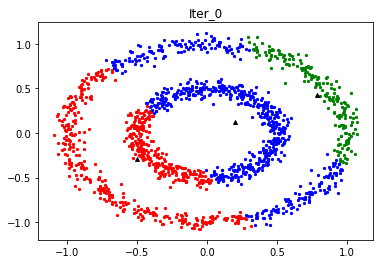

Center_0: [-0.47714756 -0.2865203 ]
Center_1: [0.75973002 0.36507592]
Center_2: [0.1868134  0.14420761]


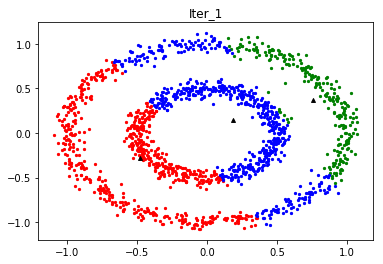

In [6]:
Kmeans(data,3)

## DBSCAN

In [8]:
def DBSCAN(Dataset, radius, MinPts): 
    labels = [0] * len(Dataset)
    cluster_num = 0
    for index in range(len(Dataset)):
        if not (labels[index] == 0):
            continue
        NeighborPts = getNeighbors(Dataset, index, radius)
        if len(NeighborPts) < MinPts:
            labels[index] = -1
        else: 
            cluster_num += 1
            update(Dataset, labels, index, NeighborPts, cluster_num, radius, MinPts)
    return labels


def update(Dataset, labels, index, NeighborPts, cluster_num, radius, MinPts):
    labels[index] = cluster_num
    i = 0
    while i < len(NeighborPts):    
        neighbor_index = NeighborPts[i]
        if labels[neighbor_index] == -1:
            labels[neighbor_index] = cluster_num
        elif labels[neighbor_index] == 0:
            labels[neighbor_index] = cluster_num
            PnNeighborPts = getNeighbors(Dataset, neighbor_index, radius)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
        i += 1        


def getNeighbors(Dataset, index, radius):
    neighbors = []
    for node in range(len(Dataset)):
        if np.linalg.norm(Dataset[index] - Dataset[node]) < radius:
            neighbors.append(node)  
    return neighbors

In [9]:
my_labels = DBSCAN(data, 0.07, 2)
#0.2 5

In [10]:
a = np.array(my_labels)

In [11]:
np.unique(a)

array([-1,  1,  2,  3])

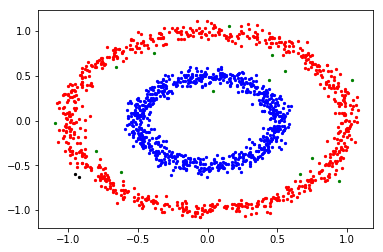

In [12]:
plt.scatter(data[np.where(a == 1)][:, 0], data[np.where(a == 1)][:, 1], c='r', s=5)
plt.scatter(data[np.where(a == 2)][:, 0], data[np.where(a == 2)][:, 1], c='b', s=5)
plt.scatter(data[np.where(a == 3)][:, 0], data[np.where(a == 3)][:, 1], c='k', s=5)
plt.scatter(data[np.where(a == -1)][:, 0], data[np.where(a == -1)][:, 1], c='g', s=5)
plt.savefig("DBSCAN_moon.png")
plt.show()


## kernel_KMeans

In [14]:
def kernel_KMeans(dataset, sigma, K=2):
    n = len(dataset)
    gram = np.zeros((n, n))
    # Gram matrix
    for index, point in enumerate(dataset):
        dist = np.linalg.norm((dataset - point), axis=1).reshape(1, -1) 
        gram[index] = np.exp((-1 * dist**2) / (2 * sigma**2))

    # Centers 
    centers = np.zeros((K, gram.shape[1]))
    for i in range(K):
        centers[i] = gram[i]
#     centers = kpp(gram)

    for _ in range(30):
        # Distance from each center   
        dists = np.zeros((K, gram.shape[1]))
        for i in range(K):
            dist = np.linalg.norm(gram - centers[i], axis=1)
            dists[i] = dist
        result = np.argmin(dists, axis=0)
        clusters = []
        t = []
        color = ['r', 'g', 'b']
        for i in range(K):
            clusters.append(gram[np.where(result == i)])
            t.append(data[np.where(result == i)])
            centers[i] = np.mean(np.array(clusters[i]), axis=0)
            print(np.mean(t[i], axis=0))
            print("Center_{}: {}".format(i, centers[i]))
            plt.scatter(t[i][:, 0], t[i][:, 1], c=color[i], s=5)
            plt.scatter(np.mean(t[i], axis=0)[0], np.mean(t[i], axis=0)[1], marker='^', c='k')
            plt.title("Iter_{}".format(_))
#         plt.savefig("kernel_moon_3{}.png".format(_))
        plt.show()


[-0.67925487 -0.67631657]
Center_0: [3.93637342e-01 8.45022070e-28 1.82403539e-16 ... 3.89975628e-03
 6.90605827e-03 2.64066945e-17]
[0.05772567 0.05650801]
Center_1: [0.00052126 0.03144004 0.05830042 ... 0.0625213  0.03176123 0.02623072]


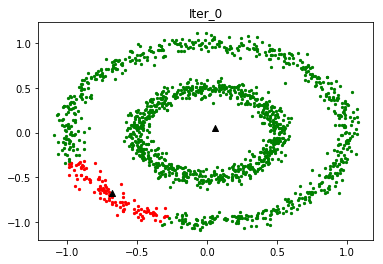

[-0.67853143 -0.67113479]
Center_0: [3.65819919e-01 8.04597558e-28 1.75792621e-16 ... 3.63425119e-03
 1.01418744e-02 5.05513775e-17]
[0.06248671 0.06083298]
Center_1: [0.0004972  0.03164598 0.0586823  ... 0.06292963 0.0316273  0.02640254]


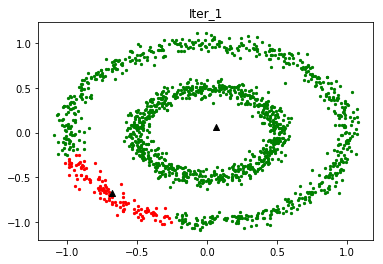

[-0.67873017 -0.66489499]
Center_0: [3.51920619e-01 3.67283471e-27 4.19078256e-16 ... 3.50568310e-03
 1.41069920e-02 6.41318736e-16]
[0.06521215 0.06290926]
Center_1: [0.00049296 0.03176156 0.05889663 ... 0.0631585  0.03132635 0.02649897]


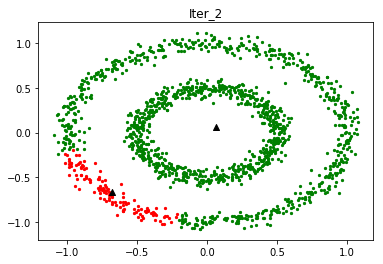

[-0.68624561 -0.65004007]
Center_0: [3.36535471e-01 3.72346279e-27 4.23634603e-16 ... 3.36217734e-03
 1.59519431e-02 9.16803681e-16]
[0.06924243 0.06461997]
Center_1: [0.00049237 0.03190138 0.05915589 ... 0.06343552 0.03121671 0.02661562]


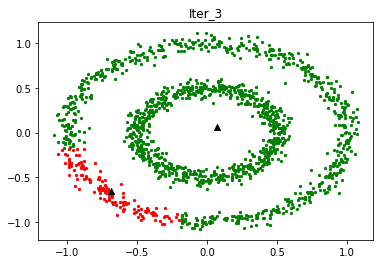

[-0.68206593 -0.64589046]
Center_0: [3.22444885e-01 1.73461025e-26 1.12670646e-15 ... 3.22939446e-03
 2.37654762e-02 4.80725302e-15]
[0.07214238 0.06734257]
Center_1: [0.00049141 0.03204243 0.05941745 ... 0.06371513 0.03046082 0.0267333 ]


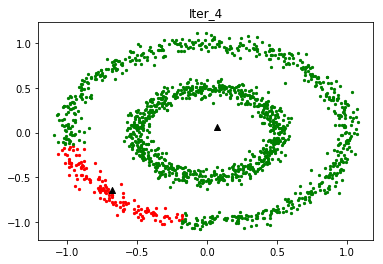

[-0.67100224 -0.63979843]
Center_0: [2.95603941e-01 1.49079959e-25 4.70029547e-15 ... 2.97148232e-03
 4.23677391e-02 2.57081609e-14]
[0.07815337 0.07353429]
Center_1: [0.00049275 0.03235237 0.05999217 ... 0.06433012 0.02836639 0.02699188]


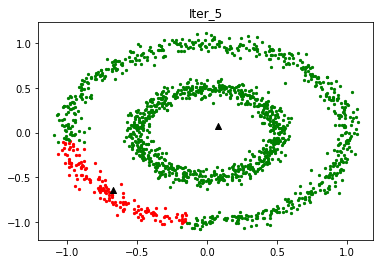

[-0.65299922 -0.63539558]
Center_0: [2.65031496e-01 4.12468734e-25 7.72762334e-15 ... 2.66899846e-03
 7.46279605e-02 3.93054336e-13]
[0.08596052 0.08263979]
Center_1: [0.00049848 0.03279154 0.06080655 ... 0.06520273 0.02394308 0.02735828]


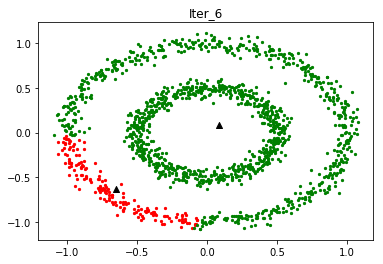

[-0.62108078 -0.63032102]
Center_0: [2.29431260e-01 2.26647486e-23 6.40053004e-14 ... 2.31195343e-03
 1.30990549e-01 2.16023978e-11]
[0.09638108 0.09677911]
Center_1: [0.00050869 0.03347312 0.06207042 ... 0.06655776 0.01416835 0.02792693]


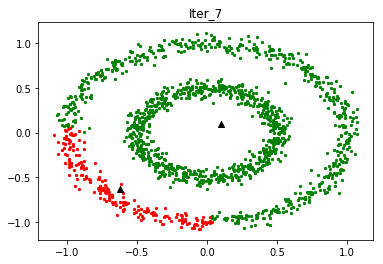

[-0.60670206 -0.60917868]
Center_0: [2.07728404e-01 5.76010070e-21 2.30993021e-12 ... 2.09473317e-03
 1.57673897e-01 1.48298343e-09]
[0.10567264 0.10505415]
Center_1: [0.00051703 0.03402315 0.06309036 ... 0.06765117 0.0076136  0.02838582]


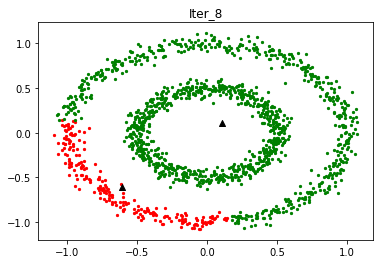

[-0.58770438 -0.5944741 ]
Center_0: [1.91351477e-01 8.46494270e-20 8.51402194e-12 ... 1.92962691e-03
 1.63885840e-01 3.34333664e-08]
[0.11278676 0.1130181 ]
Center_1: [0.00052483 0.0345366  0.06404248 ... 0.06867211 0.00415989 0.0288142 ]


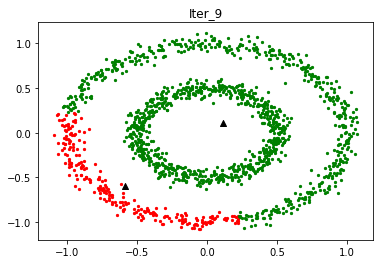

[-0.56226474 -0.57622607]
Center_0: [1.74021532e-01 1.80849651e-18 4.61948632e-11 ... 1.75487964e-03
 1.60866606e-01 4.21328585e-07]
[0.12094084 0.12285137]
Center_1: [0.00053503 0.03520776 0.06528703 ... 0.07000663 0.00170376 0.02937407]


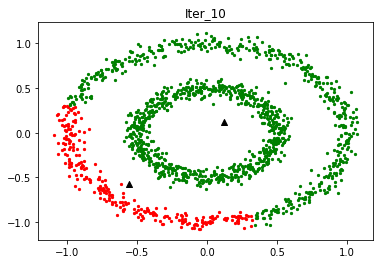

[-0.53263769 -0.55532693]
Center_0: [1.58473216e-01 2.42224095e-16 4.26750751e-10 ... 1.59808689e-03
 1.48886319e-01 1.09967193e-05]
[0.12850236 0.13285498]
Center_1: [0.00054653 0.03596491 0.06669105 ... 0.07151215 0.00116449 0.03000321]


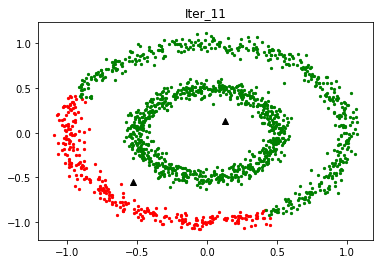

[-0.50010333 -0.52665191]
Center_0: [1.44111581e-01 1.91702786e-14 4.53907746e-09 ... 1.45326056e-03
 1.35779898e-01 2.00874180e-04]
[0.13592784 0.14199165]
Center_1: [0.00055997 0.0368488  0.06833007 ... 0.07326965 0.00108832 0.03068882]


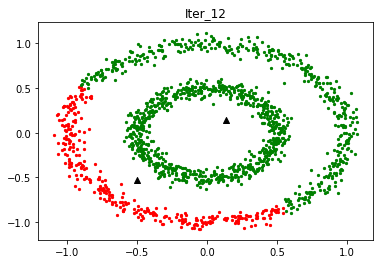

[-0.47121879 -0.49890203]
Center_0: [1.33668713e-01 2.38552952e-12 6.87252649e-08 ... 1.34795183e-03
 1.25957343e-01 1.74332478e-03]
[0.1410669  0.14817553]
Center_1: [0.00057209 0.03764639 0.06980905 ... 0.07485557 0.00110693 0.030888  ]


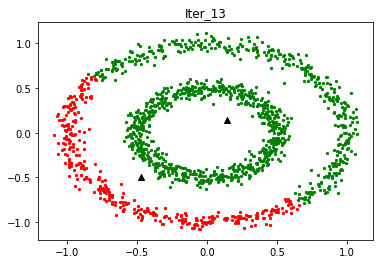

[-0.44042306 -0.45838714]
Center_0: [1.22975216e-01 2.08780787e-10 5.14338345e-07 ... 1.24011568e-03
 1.15881509e-01 1.04020056e-02]
[0.14712927 0.15192597]
Center_1: [0.00058734 0.03865029 0.07167048 ... 0.07685172 0.0011362  0.02877896]


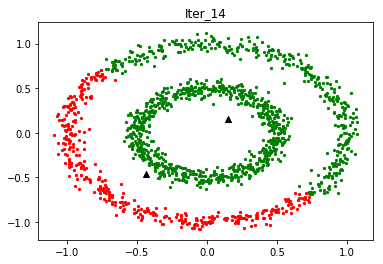

[-0.39567984 -0.40280395]
Center_0: [1.10855062e-01 1.37839927e-08 4.05349910e-06 ... 1.11789274e-03
 1.04460538e-01 3.84266213e-02]
[0.15218136 0.15367894]
Center_1: [0.00060956 0.04011215 0.07437988 ... 0.07975848 0.00117916 0.0187192 ]


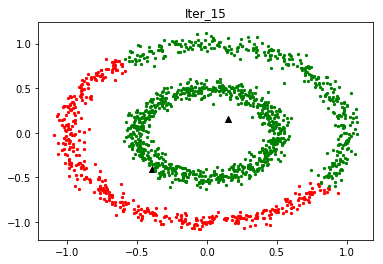

[-0.34504342 -0.3492934 ]
Center_0: [1.00909641e-01 2.00241815e-06 4.93364565e-05 ... 1.01760040e-03
 9.50888052e-02 6.62334657e-02]
[0.1515308  0.15210797]
Center_1: [0.00063352 0.04168808 0.07728373 ... 0.08289376 0.00122551 0.00576068]


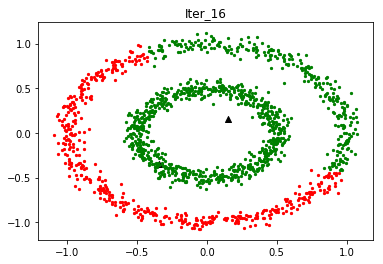

[-0.28128252 -0.2929471 ]
Center_0: [0.09149942 0.00019582 0.00027092 ... 0.00092271 0.0862214  0.07137856]
[0.14269897 0.1472559 ]
Center_1: [0.00066341 0.04355711 0.0808162  ... 0.08680541 0.00128334 0.0003035 ]


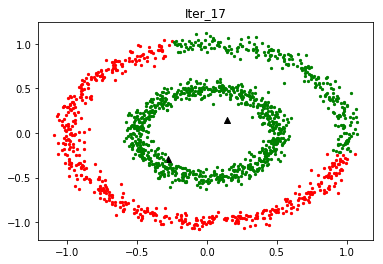

[-0.20144404 -0.20927326]
Center_0: [0.08133281 0.00961816 0.00090637 ... 0.00082018 0.07664124 0.06390223]
[0.12280873 0.1261302 ]
Center_1: [7.08209905e-04 4.07589303e-02 8.58687758e-02 ... 9.26668686e-02
 1.36999587e-03 4.77169718e-05]


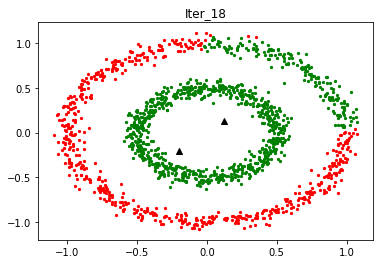

[-0.09961993 -0.09859241]
Center_0: [0.07051331 0.05210792 0.00128205 ... 0.00071108 0.06644585 0.05540195]
[0.07743879 0.07506025]
Center_1: [7.81040001e-04 1.11146576e-02 9.43156307e-02 ... 1.02196440e-01
 1.51088197e-03 5.22530422e-05]


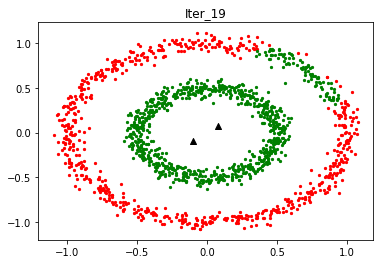

[1.04677890e-04 9.30377728e-05]
Center_0: [0.06148761 0.05648261 0.00119518 ... 0.00062006 0.05794078 0.0483105 ]
[ 0.0003777  -0.00139766]
Center_1: [8.81013122e-04 1.49283014e-03 1.06310794e-01 ... 1.15277585e-01
 1.70427486e-03 5.89414104e-05]


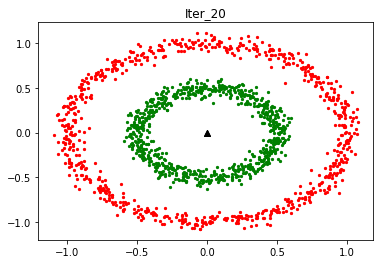

[1.04677890e-04 9.30377728e-05]
Center_0: [0.06148761 0.05648261 0.00119518 ... 0.00062006 0.05794078 0.0483105 ]
[ 0.0003777  -0.00139766]
Center_1: [8.81013122e-04 1.49283014e-03 1.06310794e-01 ... 1.15277585e-01
 1.70427486e-03 5.89414104e-05]


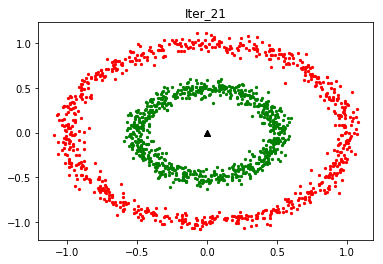

[1.04677890e-04 9.30377728e-05]
Center_0: [0.06148761 0.05648261 0.00119518 ... 0.00062006 0.05794078 0.0483105 ]
[ 0.0003777  -0.00139766]
Center_1: [8.81013122e-04 1.49283014e-03 1.06310794e-01 ... 1.15277585e-01
 1.70427486e-03 5.89414104e-05]


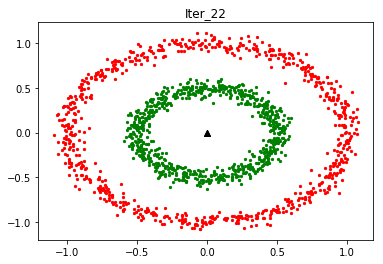

[1.04677890e-04 9.30377728e-05]
Center_0: [0.06148761 0.05648261 0.00119518 ... 0.00062006 0.05794078 0.0483105 ]
[ 0.0003777  -0.00139766]
Center_1: [8.81013122e-04 1.49283014e-03 1.06310794e-01 ... 1.15277585e-01
 1.70427486e-03 5.89414104e-05]


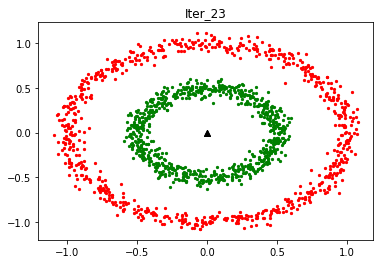

[1.04677890e-04 9.30377728e-05]
Center_0: [0.06148761 0.05648261 0.00119518 ... 0.00062006 0.05794078 0.0483105 ]
[ 0.0003777  -0.00139766]
Center_1: [8.81013122e-04 1.49283014e-03 1.06310794e-01 ... 1.15277585e-01
 1.70427486e-03 5.89414104e-05]


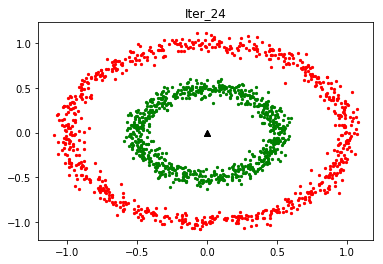

[1.04677890e-04 9.30377728e-05]
Center_0: [0.06148761 0.05648261 0.00119518 ... 0.00062006 0.05794078 0.0483105 ]
[ 0.0003777  -0.00139766]
Center_1: [8.81013122e-04 1.49283014e-03 1.06310794e-01 ... 1.15277585e-01
 1.70427486e-03 5.89414104e-05]


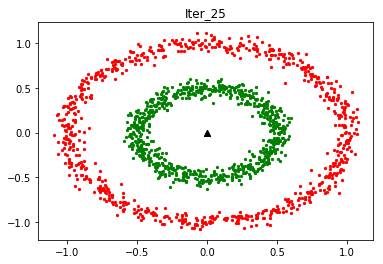

[1.04677890e-04 9.30377728e-05]
Center_0: [0.06148761 0.05648261 0.00119518 ... 0.00062006 0.05794078 0.0483105 ]
[ 0.0003777  -0.00139766]
Center_1: [8.81013122e-04 1.49283014e-03 1.06310794e-01 ... 1.15277585e-01
 1.70427486e-03 5.89414104e-05]


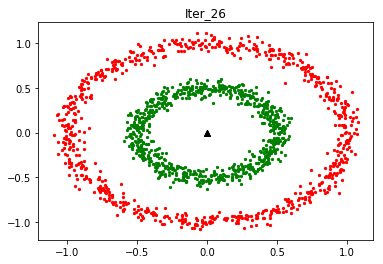

[1.04677890e-04 9.30377728e-05]
Center_0: [0.06148761 0.05648261 0.00119518 ... 0.00062006 0.05794078 0.0483105 ]
[ 0.0003777  -0.00139766]
Center_1: [8.81013122e-04 1.49283014e-03 1.06310794e-01 ... 1.15277585e-01
 1.70427486e-03 5.89414104e-05]


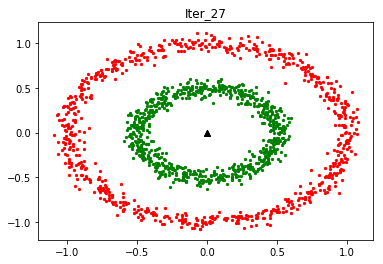

[1.04677890e-04 9.30377728e-05]
Center_0: [0.06148761 0.05648261 0.00119518 ... 0.00062006 0.05794078 0.0483105 ]
[ 0.0003777  -0.00139766]
Center_1: [8.81013122e-04 1.49283014e-03 1.06310794e-01 ... 1.15277585e-01
 1.70427486e-03 5.89414104e-05]


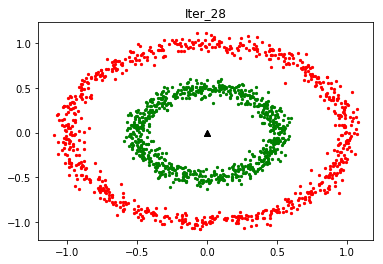

[1.04677890e-04 9.30377728e-05]
Center_0: [0.06148761 0.05648261 0.00119518 ... 0.00062006 0.05794078 0.0483105 ]
[ 0.0003777  -0.00139766]
Center_1: [8.81013122e-04 1.49283014e-03 1.06310794e-01 ... 1.15277585e-01
 1.70427486e-03 5.89414104e-05]


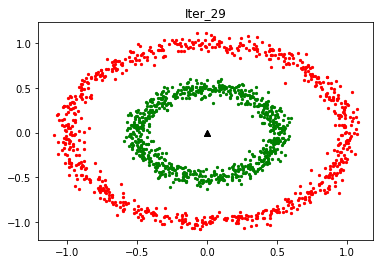

In [15]:
kernel_KMeans(data, 0.15, 2)

## Spectral Clustering

pick_num = 1430
pick_num = 1363


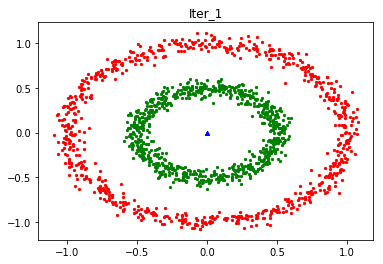

In [17]:
k = 2 #numb of clusters
initCentroidMethod = "random" #options: random, kmeans++, badInit, zeroInit

def initCentroid(dataIn, method, k):
    if (method=="random"):
        result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

def similarity(dataIn, sigma=0.1):
    n = len(dataIn)
    result = np.zeros((n, n))
    # Weight
    for index, point in enumerate(dataIn):
        dist = np.linalg.norm((dataIn - point), axis=1).reshape(1, -1) 
        result[index] = np.exp((-1 * dist**2) / (2 * sigma**2))
    return result

def degree(similarityMatrix):
    diag = similarityMatrix.sum(axis=1)
    result = np.diag(diag)
    return result

def spectrum(laplacian, K=2):
    eig_vals, eig_vecs = np.linalg.eig(laplacian)
    ind = eig_vals.real.argsort()[:K]
    result = np.ndarray(shape=(laplacian.shape[0],0))
    for i in range(1, ind.shape[0]):
        cor_e_vec = np.transpose(np.matrix(eig_vecs[:,np.asscalar(ind[i])]))
        result = np.concatenate((result, cor_e_vec), axis=1)
    return result

W = similarity(data)
D = degree(W)
L = D-W
transformedData = spectrum(L)
            
def sepctral_clustering(dataset, transformedData, centers):
    nCluster = centers.shape[0]
    global k
    times = 0
    while(True):
        times +=1
        dists = np.zeros((transformedData.shape[0], 0))
        for i in range(nCluster):
            dist = np.linalg.norm(transformedData - centers[i], axis=1).reshape(-1, 1)
            dists = np.concatenate((dists, dist), axis=1)
            
        clusters = np.ravel(np.argmin(np.matrix(dists), axis=1))
        cluster_mem = []
        cluster_data = []        
        for i in range(nCluster):
            cluster_mem.append(transformedData[np.where(clusters == i)])
            cluster_data.append(dataset[np.where(clusters == i)])

        new_centers = np.ndarray(shape=(0, centers.shape[1]))
        new_data = np.ndarray(shape=(0, dataset.shape[1]))
        
        for i in range(nCluster):
            centroidClusterTransf = np.asmatrix(cluster_mem[i]).mean(axis=0)
            centroidClusterOri = np.asmatrix(cluster_data[i]).mean(axis=0)
            new_centers = np.concatenate((new_centers, centroidClusterTransf), axis=0)
            new_data = np.concatenate((new_data, centroidClusterOri), axis=0)

        if((centers == new_centers).all()):
            break
            
        centers = new_centers  
        color = ['r', 'g', 'b']
        for i in range(nCluster):
            plt.scatter(cluster_data[i][:, 0], cluster_data[i][:,1], c=color[i], s=5)
        center = np.array(new_data)
        plt.scatter(center[:,0], center[:,1], c='b', s=15, marker='^')
        plt.title("Iter_{}".format(times))
        plt.savefig("spectral_clustering_circle_iter{}".format(times))
        plt.show()
        
    

# centers = initCentroid(transformedData, initCentroidMethod, k)
centers = kpp(transformedData)
sepctral_clustering(data, transformedData, centers)


In [18]:
kpp(data)

pick_num = 191
pick_num = 854


array([[-0.41767925, -0.29220366],
       [ 0.67989201,  0.70896127]])